# Introduction

In an image, `noise` is the random variation of brightness or color
information in images. It can be produced by the sensor of the
camera, the environment, or the transmission of the image. 

The `noise` can be in different forms, such as:

- `Random Noise`
- `Salt-and-pepper Noise`
- `Camera Noise`
- `Colored Noise`

# Setup

In [ ]:
%pip install opencv-python opencv-contrib-python numpy matplotlib

# Initial Setup

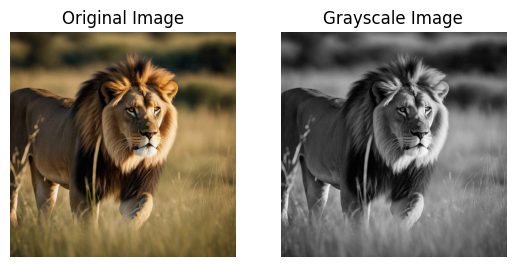

In [11]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asset Root
asset_root = '../../assets/'

# Image Path
image_path = asset_root + '/images/hunting_lion.jpg'

# Read Image and convert to RGB
input_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# Display Both Image
plt.figure("Hunting Lion")

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.show()

## Random Noise

The `random noise` is the noise that is added to the image randomly.
It can be produced by the sensor of the camera, the environment, or
the transmission of the image.

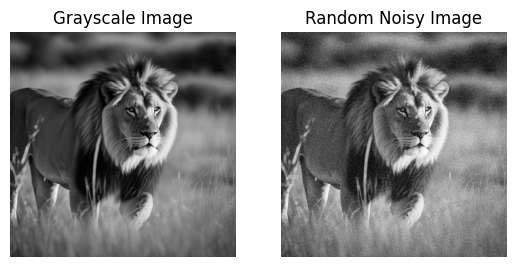

In [12]:
# Add random noise to an image using OpenCV
def add_random_noise(image, mean=0, std=50):
    noise = cv2.randn(image.copy(), mean, std)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Add random noise to the grayscale image
random_noisy_image = add_random_noise(gray_image, 0, 50)

# Display Both Image
plt.figure("Random Noise")

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(random_noisy_image, cmap='gray')
plt.title("Random Noisy Image")
plt.axis('off')

plt.show()

The code above adds random noise to the grayscale image.
The `add_random_noise` function adds random noise to the image
using the `cv2.randn` function.

## Salt-and-pepper Noise

The `salt-and-pepper noise` is the noise that is added to the image
in the form of white and black pixels. This was common in the early
days of CCD cameras, where the some of the pixels in the image were
either white or black.

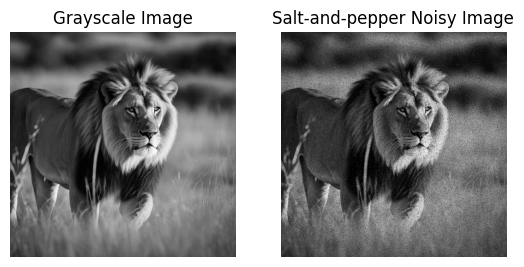

In [13]:
# Add salt-and-pepper noise to an image using OpenCV
def add_salt_and_pepper_noise(image, salt_vs_pepper=0.5, amount=0.02):
    noisy_image = image.copy()
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))
    
    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255
    
    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    
    return noisy_image

# Add salt-and-pepper noise to the grayscale image
salt_pepper_noisy_image = add_salt_and_pepper_noise(gray_image, 0.05, 0.1)

# Display Both Image
plt.figure("Salt-and-pepper Noise")

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title("Salt-and-pepper Noisy Image")
plt.axis('off')

plt.show()

The code above adds salt-and-pepper noise to the grayscale image.
The `add_salt_and_pepper_noise` function adds salt-and-pepper noise
to the image using the `np.random.randint` function. The function
first calculates the number of salt and pepper pixels based on the
amount and then adds the salt and pepper noise to the image.

## Camera Noise

The `camera noise` is the noise that is produced by the camera sensor.
It can be in the form of random noise, salt-and-pepper noise, or other
types of noise. The camera noise can be reduced by using a better
camera sensor or by using image processing techniques.

## Colored Noise

The `colored noise` is the noise that is added to the image in the form
of colored pixels. For an RGB image, this random noise appear as
blotches of color in the image. The reason is that the noise is applied
to the low-frequency components of the image, which are the color that
corresponds to large areas of the image.

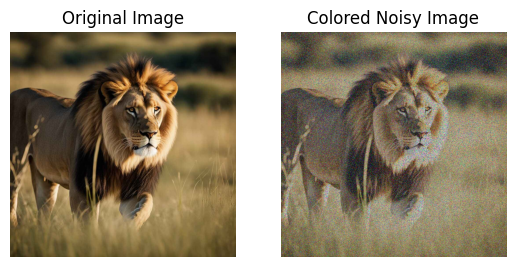

In [14]:
# Add colored noise to am RGB image using OpenCV
def add_colored_noise(image, mean=0, std=50):
    # Noise for each channel
    noise_r = cv2.randn(image[:, :, 0].copy(), mean, std)
    noise_g = cv2.randn(image[:, :, 1].copy(), mean, std)
    noise_b = cv2.randn(image[:, :, 2].copy(), mean, std)
    
    # Add noise to each channel
    noisy_image = cv2.merge([image[:, :, 0] + noise_r, image[:, :, 1] + noise_g, image[:, :, 2] + noise_b])
    
    return noisy_image

# Add colored noise to the input image
colored_noisy_image = add_colored_noise(input_image, 0, 100)

# Display Both Image
plt.figure("Colored Noise")

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(colored_noisy_image)
plt.title("Colored Noisy Image")
plt.axis('off')

plt.show()

The code above adds colored noise to the input image. The
`add_colored_noise` function adds colored noise to the image
by adding noise to each channel of the image using the `cv2.randn`
function. The function then merges the noisy channels to create
the colored noisy image.

# Noise Reduction or Noise Removal

`Noise reduction` is the process of removing noise from an image. The
`noise` can be removed using different techniques, such as:

- `Smoothing`
- `Low-pass Filtering`
- `Eroding and Dilating`
- `Median Filtering`

## Smoothing

`Smoothing` is the process of reducing the noise in an image by
reducing the high-frequency components of the image. `Smoothing`
uses blurring techniques to reduce the noise in the image. Common
blurring techniques include:

- `Averaging`
- `Gaussian Blurring`
- `Median Blurring`
- `Bilateral Filtering`

In this example, we will use the `Gaussian Blurring` technique to
reduce the noise in the image. The `Gaussian Blurring` technique
reduces the noise by convolving the image with a Gaussian kernel.
It uses the formula:

$$
G(x, y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

where:

- $G(x, y)$ is the Gaussian kernel
- $\sigma$ is the standard deviation of the Gaussian kernel
- $x$ and $y$ are the coordinates of the kernel
- $e$ is the Euler's number
- $\pi$ is the mathematical constant $\pi$

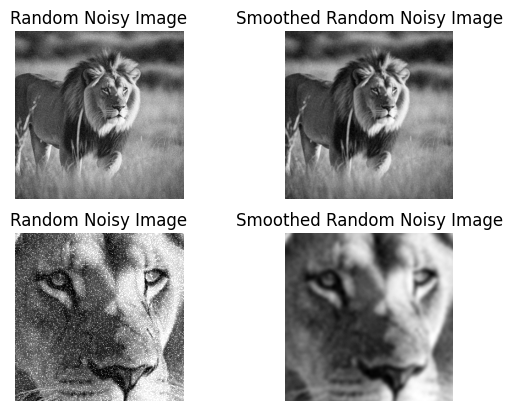

In [15]:
# Apply Gaussian Blurring to the image with random noise
def apply_gaussian_blurring(image, kernel_size=(5, 5), sigma_x=0):
    smoothed_image = cv2.GaussianBlur(image, kernel_size, sigma_x)
    return smoothed_image

# Apply Gaussian Blurring to the random noisy image
smoothed_random_noisy_image = apply_gaussian_blurring(random_noisy_image, (9, 9), 2)

# Display Both Image
plt.figure("Smoothing")

plt.subplot(2, 2, 1)
plt.imshow(random_noisy_image, cmap='gray')
plt.title("Random Noisy Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(smoothed_random_noisy_image, cmap='gray')
plt.title("Smoothed Random Noisy Image")
plt.axis('off')

# Add Zoomed Comparison
plt.subplot(2, 2, 3)
plt.imshow(random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Random Noisy Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(smoothed_random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Smoothed Random Noisy Image")
plt.axis('off')

plt.show()

The code above shows the application of `Gaussian Blurring` to an image
with random noise. The first image is the random noisy image, and the
second image is the smoothed random noisy image. The third and fourth
images show a zoomed comparison of the random noisy image and the
smoothed random noisy image. The `Gaussian Blurring` operation
is one of the methods used in `Smoothing` an image. This operation
is used to reduce noise in an image by averaging the pixel values
in the neighborhood of each pixel. The `Gaussian Blurring` operation
is defined by a kernel size and a standard deviation. The kernel size
defines the size of the neighborhood used to compute the average pixel
value, and the standard deviation defines the spread of the Gaussian
distribution used to compute the weights of the pixel values in the
neighborhood.

## Low-pass Filtering

`Low-pass filtering`, also called as `Lopass`, is the process of reducing the noise in an image
by reducing the high-frequency components of the image. `Low-pass
filtering` uses a filter to remove the high-frequency components of
the image. Common `low-pass filters` include:

- `Box Filter`
- `Gaussian Filter`
- `Median Filter`
- `Bilateral Filter`

In this example, we will use the `Box Filter` to reduce the noise in
the image. The `Box Filter` uses a kernel to convolve the image and
remove the high-frequency components of the image. The `Box Filter`
uses the formula:

$$
K = \frac{1}{n^2} \times \begin{bmatrix} 1 & 1 & 1 & \ldots & 1 \\ 1 & 1 & 1 & \ldots & 1 \\ 1 & 1 & 1 & \ldots & 1 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & 1 & 1 & \ldots & 1 \end{bmatrix}
$$

where:

- $K$ is the kernel
- $n$ is the size of the kernel
- $1$ is the value of the kernel

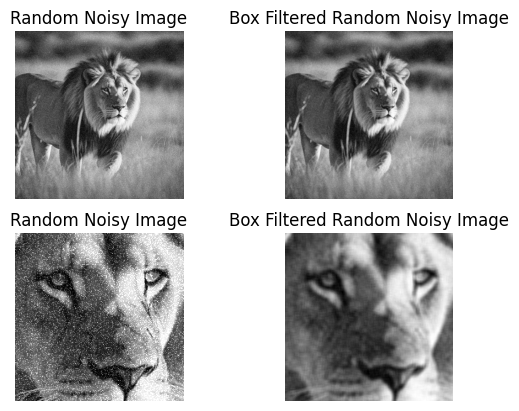

In [16]:
# Apply Box Filter to the image with random noise
def apply_box_filter(image, kernel_size=(5, 5)):
    box_filtered_image = cv2.boxFilter(image, -1, kernel_size)
    return box_filtered_image

# Apply Box Filter to the random noisy image
box_filtered_random_noisy_image = apply_box_filter(random_noisy_image, (5, 5))

# Display Both Image
plt.figure("Low-pass Filtering")

plt.subplot(2, 2, 1)
plt.imshow(random_noisy_image, cmap='gray')
plt.title("Random Noisy Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(box_filtered_random_noisy_image, cmap='gray')
plt.title("Box Filtered Random Noisy Image")
plt.axis('off')

# Add Zoomed Comparison
plt.subplot(2, 2, 3)
plt.imshow(random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Random Noisy Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(box_filtered_random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Box Filtered Random Noisy Image")
plt.axis('off')

plt.show()

In the above code, we have implemented the `Box Filter` on a
random noisy image to remove the noise. The Box Filter is a
simple and fast low-pass filter that replaces each pixel in
the image with the average of its neighboring pixels.

## Eroding and Dilating

`Eroding` and `Dilating` are the process of reducing the noise in an
image by removing the high-frequency components of the image. `Eroding`
and `Dilating` uses a kernel to remove the high-frequency components of
the image.

In this example, we will use the `Erosion` and `Dilation` techniques to
reduce the noise in the image. The `Erosion` technique removes the high-
frequency components of the image by shrinking or removing pixels from the boundaries of objects. The `Dilation` technique removes the high-frequency components of the image by expanding or adding pixels to the boundaries of objects.

The `Erosion` and `Dilation` techniques use the formula:

$$
E = \min_{(x, y) \in S} I(x, y)
$$

$$
D = \max_{(x, y) \in S} I(x, y)
$$

where:

- $E$ is the eroded image
- $D$ is the dilated image
- $S$ is the structuring element
- $I(x, y)$ is the image

<Figure size 640x480 with 0 Axes>

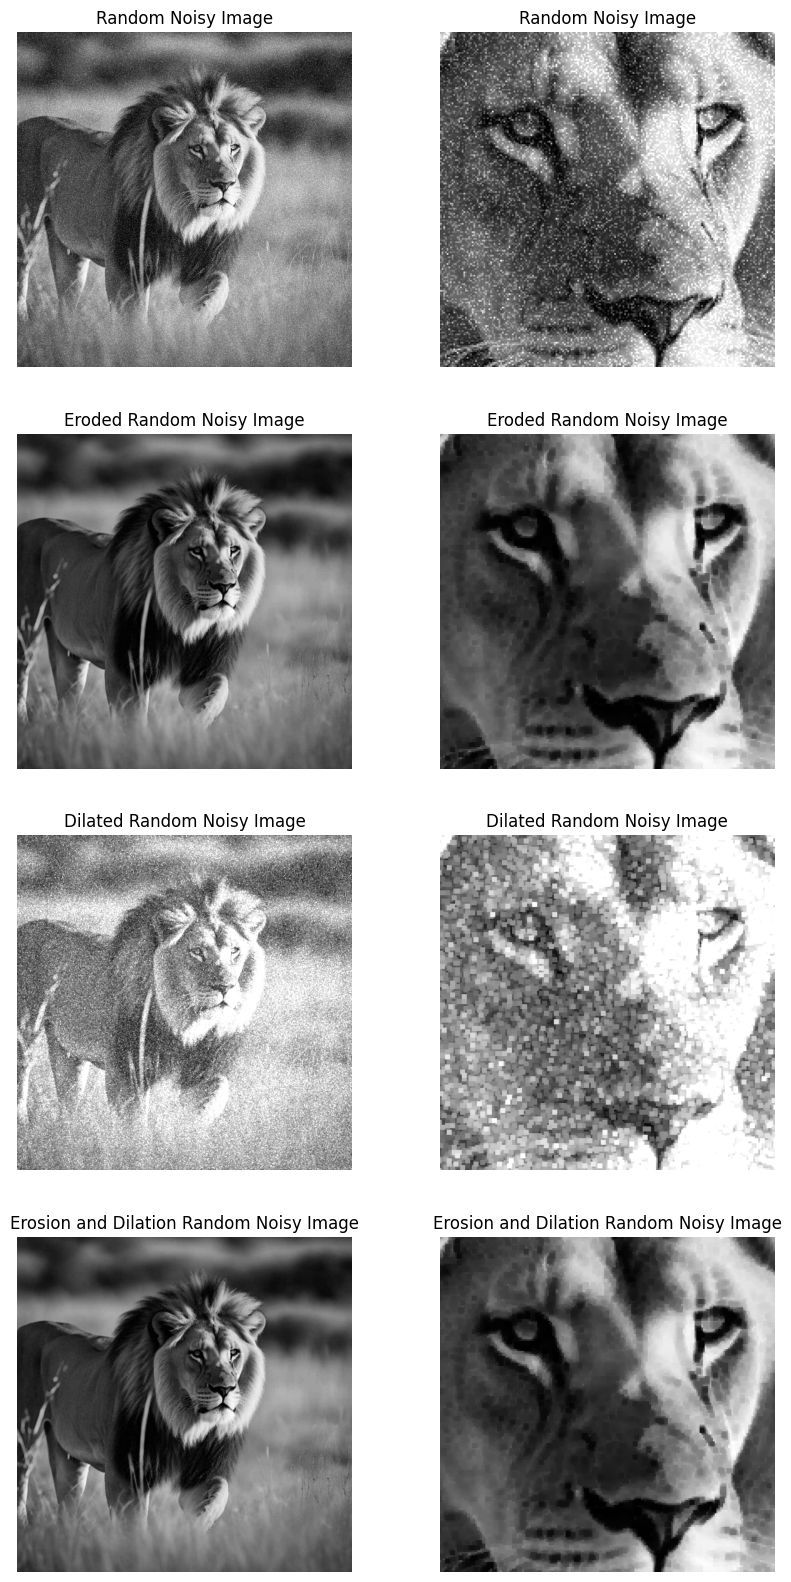

In [17]:
# Apply Erosion to the image with random noise
def apply_erosion(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

# Apply Dilation to the image with random noise
def apply_dilation(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    return dilated_image

# Apply Erosion and Dilation to the random noisy image and return combined image
def apply_erosion_dilation(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    return eroded_image

# Apply Erosion and Dilation to the random noisy image
eroded_random_noisy_image = apply_erosion(random_noisy_image, (3, 3))
dilated_random_noisy_image = apply_dilation(random_noisy_image, (3, 3))
erosion_dilation_random_noisy_image = apply_erosion_dilation(random_noisy_image, (3, 3))

# Display Both Image
plt.figure("Eroding and Dilating")

fig, ax = plt.subplots(4, 2, figsize=(10, 20))

plt.subplot(4, 2, 1)
plt.imshow(random_noisy_image, cmap='gray')
plt.title("Random Noisy Image")
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Random Noisy Image")
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(eroded_random_noisy_image, cmap='gray')
plt.title("Eroded Random Noisy Image")
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(eroded_random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Eroded Random Noisy Image")
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(dilated_random_noisy_image, cmap='gray')
plt.title("Dilated Random Noisy Image")
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(dilated_random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Dilated Random Noisy Image")
plt.axis('off')

plt.subplot(4, 2, 7)
plt.imshow(erosion_dilation_random_noisy_image, cmap='gray')
plt.title("Erosion and Dilation Random Noisy Image")
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(erosion_dilation_random_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Erosion and Dilation Random Noisy Image")
plt.axis('off')

plt.show()

The code above shows the implementation of `noise reduction`
using `Erosion` and `Dilation` on a `random noisy image`. The
application of `Erosion` and `Dilation` on the `random noisy image`
helps to reduce the noise in the image. The `Erosion` operation
helps to remove the noise in the image by shrinking the boundaries
of the objects in the image. The `Dilation` operation helps to
remove the noise in the image by expanding the boundaries of the
objects in the image. The combination of `Erosion` and `Dilation`
operations helps to reduce the noise in the image by removing the
noise in the image and preserving the objects in the image.

## Median Filtering

`Median filtering` is the process of reducing the noise in an image
by computing the local average for each pixel in the image. It is
very similar to `smoothing`, but it uses the median value instead
of the average value. The `median filtering` technique reduces the
noise by replacing each pixel with the median value of the pixels
in the neighborhood.

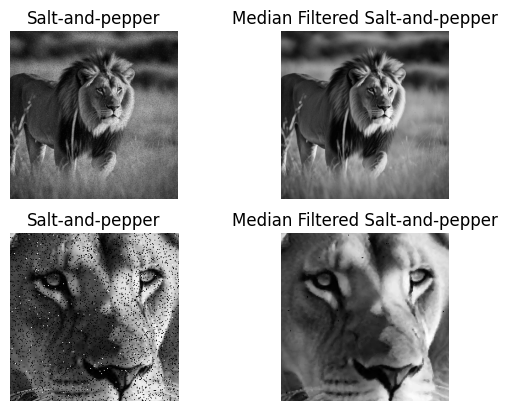

In [18]:
# Apply Median Filtering to the image with salt-and-pepper noise
def apply_median_filtering(image, kernel_size=5):
    median_filtered_image = cv2.medianBlur(image, kernel_size)
    return median_filtered_image

# Apply Median Filtering to the salt-and-pepper noisy image
median_filtered_salt_pepper_noisy_image = apply_median_filtering(salt_pepper_noisy_image, 3)

# Display Both Image
plt.figure("Median Filtering")

plt.subplot(2, 2, 1)
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title("Salt-and-pepper")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(median_filtered_salt_pepper_noisy_image, cmap='gray')
plt.title("Median Filtered Salt-and-pepper")
plt.axis('off')

# Add Zoomed Comparison
plt.subplot(2, 2, 3)
plt.imshow(salt_pepper_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Salt-and-pepper")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(median_filtered_salt_pepper_noisy_image[300:500, 500:700], cmap='gray')
plt.title("Median Filtered Salt-and-pepper") 
plt.axis('off')

plt.show()

The above code shows the implementation of `Median Filtering` to
reduce the salt-and-pepper noise in an image. The code uses the
`cv2.medianBlur()` function to apply median filtering to the image
with salt-and-pepper noise. The function takes the noisy image and
a kernel size as input and returns the median filtered image. This
kernel size determines the size of the neighborhood used to compute
the median value for each pixel.

An example of calculating the median value for a pixel in a 3x3
neighborhood is shown below:

$$
\begin{bmatrix}
3 & 1 & 2 \\
1 & 3 & 4 \\
2 & 4 & 5
\end{bmatrix}
$$

The median value for the pixel at the center of the neighborhood
is calculated by sorting the pixel values in the neighborhood and
selecting the middle value. In this case, the sorted values are:

$$
\begin{bmatrix}
1 & 1 & 2 & 2 & 3 & 3 & 4 & 4 & 5
\end{bmatrix}
$$

The middle value is 3, so the median value for the pixel at the
center of the neighborhood is 3. The median value will then be used
to replace the original pixel value in the filtered image.

# Other types of Noises

The following are some other types of noises that can be found in images:

- `Structured Noise`: This type of noise is caused by the structure of
the image itself. For example, in an image of a grid, the grid lines
may appear as noise.

- `Clutter Noise`: This type of noise is caused by the presence of
unwanted objects in the image. For example, in an image of a street,
the presence of garbage on the road may appear as noise.

- `Glint Noise`: This type of noise is caused by the reflection of light
from shiny surfaces in the image. For example, in an image of a car,
the reflection of sunlight from the car's windshield may appear as noise.

- `Shadow Noise`: This type of noise is caused by the presence of shadows
in the image. For example, a car parked under a tree may have shadows
on its body, which may appear as noise.

- `Motion Blur`: This type of noise is caused by the motion of objects
in the image. For example, in an image of a moving car, the car's
motion may cause blurring in the image, which may appear as noise.

# Summary

- `Noise` is random variations of brightness or color in images.
- `Random Noise` is a the noise that is added to an image randomly.
- `Salt-and-pepper noise` is the noise that is added to the image
in the form of white and black pixels.
- `Camera noise` is the noise that is added to the image due to the
limitations of the camera sensor.
- `Color noise` is the noise that is added to the image in the form of
random variations of color.
- `Noise reduction` is the process of removing noise from an image.
- `Smoothing` is the process of reducing noise in an image by
blurring the image.
- `Low-pass filtering` is the process of reducing noise in an image by
removing high-frequency components.
- `Erosion` is the process of reducing noise in an image by removing
pixels from the boundaries of objects.
- `Dilation` is the process of reducing noise in an image by adding
pixels to the boundaries of objects.

# References

- Thomas G. (2022). Graphic Designing: A Step-by-Step Guide (Advanced). Larsen & Keller. ISBN: 978-1-64172-536-1
- Singh M. (2022). Computer Graphics and Multimedia. Random Publications LLP. ISBN: 978-93-93884-95-4
- Singh M. (2022). Computer Graphics Science. Random Publications LLP. ISBN: 978-93-93884-03-9
- Singh M. (2022). Computer Graphics Software. Random Publications LLP. ISBN: 9789393884114
- Tyagi, V. (2021). Understanding Digital Image Processing. CRC Press.
- Ikeuchi, K. (Ed.). (2021). Computer Vision: A Reference Guide (2nd ed.). Springer.
- Bhuyan, M. K. (2020). Computer Vision and Image Processing. CRC Press.
- Howse, J., & Minichino, J. (2020). Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd.
- Kinser, J. M. (2019). Image Operators: Image Processing in Python. CRC Press.
